##  Modeling the Impact of Stomatal Resistance Parameterizations on Total Evapotranspiration in the Reynolds Mountain East catchment using pySUMMA

## 1. Introduction

One part of the Clark et al. (2015) study explored the impact of different stomatal resistance parameterizations on total evapotranspiration (ET) using a SUMMA model for the Reynolds Mountain East catchment. This study looked at three different stomatal resistance parameterizations: the simple soil resistance method, the Ball Berry method, and the Jarvis method.

In this Jupyter Notebook, the pySUMMA library is used to reproduce this analysis. First, the three different stomatal resistance parameterizations are described. Next, the Methods section describes how the pySUMMA can be used to create three different versions of the Reynolds Mountain East catchment model, one for each stomatal resistance parameterization. The Results section shows how to use pySUMMA and the Pandas library to reproduce Figure 7 from Clark et al. (2015). 

Collectively, this Jupyter Notebook serves as an example of how hydrologic modeling can be conducted directly within a Jupyter Notebook by leveraging the pySUMMA library. 

## 2. Background

### The stomatal resistance parameterizations available in SUMMA

### 1) The simple soil resistance method

\begin{equation*}
r_{{s},{sun}} = r_{{s},{shd}} = \frac{r_{0c}}{\beta_v} \,\,\,\, 
\end{equation*}
$r_{0c} \,(s\,m^{-1})$ : the minimum stomatal resistance ,     ${\beta_v}\,(-)$ : the total soil water stress function

\begin{equation*}
{\beta_v} = \sum f_{{roots},{j}} \beta_{{v},{j}}  +  f_{roots}^{aq} \beta_{v}^{aq}
\end{equation*}
$z_{soil}$ : the soil depth, $f_{{roots},{j}}$ : the root density in the $j$-th soil layer
$\beta_{{v},{j}}$ : the water availability stress funtion in the $j$-th soil layer <br/>
$f_{roots}^{aq}$ : the fraction of roots for the aquifer, $\beta_{v}^{aq}$ : water availability stress function for the aquifer

For additional detail, see: https://github.com/uva-hydroinformatics/pysumma/tree/master/sopron_2018_notebooks/simple1.png

### 2) The Ball-Berry method
 

\begin{equation*}
g_i = v_t  \frac{A_i}{c_{air}}\frac{e_{air}}{e_{sat}(T_{veg})}P_{air} + g_{min}\beta_v, \,\,\,\,   i = sun, shd
\end{equation*}

$g_i\, (micromol \,\, m^{-2} s^{-1})$ : Stomatal conductance per unit sunlit and shaded leaf area <br/> 
$A_i\, (micromol \,\, m^{-2} s^{-1})$ : a function of the rate of photosynthesis <br/>
$c_{air}\, (Pa)$ : $CO_2$ concentration at the leaf surface (time varying model forcing, representing carbon fertilization) <br/>
$g_{min}\, (micromol \,\, m^{-2} s^{-1})$ : the minimum stomatal conductance <br/>
$v_t\,(-)$ : an empirical parameter to relate transpiration to the $CO_2$ flux, where a greater value of $v_t$ means the leaf consumes more water to produce the same carbon mass <br/>

For additinoal detail, see: https://github.com/uva-hydroinformatics/pysumma/tree/master/sopron_2018_notebooks/BallBerry.png

### 3) The Jarvis method

\begin{equation*}
r_{{s},{i}} = \frac{r_{0c}}{f(Q_{{PAR},{i}})f(T_{air})f(e_{d})\beta_v} \,\,\,\,   i = sun, shd
\end{equation*}

the subscript $i$ defines either sunlit or shaded leaves <br/> 
$f(Q_{{PAR},{i}})$, $f(T_{air})$, $f(e_{d})$ : all limited to the range 0-1, represent the effects of photosynthetically-active radiation(PAR), air temperature, and vapor pressure deficit, where $ Q_{{PAR},{i}} $ represents PAR absorbed on sunlit or shaded leaves <br/> 

For additional detail, see: https://github.com/uva-hydroinformatics/pysumma/tree/master/sopron_2018_notebooks/Jarvis.png

The above images are taken from the Stomal Resistance Method section within the manual Structure for Unifying Multiple Modeling Alternatives (SUMMA), Version 1.0: Technical Description (April, 2015).

## 3. Methods

### 1) Study Area

#### The Reynolds Mountain East catchment is located in southwestern Idaho as shown in the figure below.

<img src="SummaModel_ReynoldsAspenStand_StomatalResistance/data/gis/study_area.jpg" width="1000">

### 2) Create pySUMMA Simulation Object

In [10]:
import pysumma as ps
import os

In [ ]:
instance = "SummaModel_ReynoldsAspenStand_StomatalResistance"
!cd {instance}/; chmod +x ./installTestCases_local.sh
!cd {instance}/; ./installTestCases_local.sh

In [8]:
executable = "/srv/conda/envs/notebook/bin/summa.exe"
executable

'/srv/conda/envs/notebook/bin/summa.exe'

In [11]:
# path to the SUMMA filemanager file
file_manager = os.path.join(os.getcwd(), instance, 'settings/summa_fileManager_riparianAspenSimpleResistance.txt')
file_manager

'/home/jovyan/SummaModel_ReynoldsAspenStand_StomatalResistance/settings/summa_fileManager_riparianAspenSimpleResistance.txt'

In [12]:
# Create pySUMMA Simulation Object
S = ps.Simulation(executable, file_manager)

### 3) Run SUMMA for the different stomatal resistance parameterization options on HydroShare JH

In [13]:
# set the simulation start and finish times
S.manager['simStartTime'].value  = "2006-07-01 00:00"
S.manager['simEndTime'].value = "2007-09-30 00:00"
S.manager.write()

In [14]:
print(S.manager)

controlVersion                       'SUMMA_FILE_MANAGER_V3.0.0'
simStartTime                         '2006-07-01 00:00'
simEndTime                           '2007-09-30 00:00'
tmZoneInfo                           'localTime'
settingsPath                         '/home/jovyan/SummaModel_ReynoldsAspenStand_StomatalResistance/settings/'
forcingPath                          '/home/jovyan/SummaModel_ReynoldsAspenStand_StomatalResistance/data/forcingData/'
outputPath                           '/home/jovyan/SummaModel_ReynoldsAspenStand_StomatalResistance/output/'
decisionsFile                        'summa_zDecisions_riparianAspenSimpleResistance.txt'
outputControlFile                    'meta/Model_Output.txt'
globalHruParamFile                   'summa_zLocalParamInfo.txt'
globalGruParamFile                   'summa_zBasinParamInfo.txt'
attributeFile                        'summa_zLocalAttributes_riparianAspen.nc'
trialParamFile                       'summa_zParamTrial_riparianAspen.nc'
f

In [15]:
# query for the available stomatal resistance parameterizations
S.decisions["stomResist"].available_options

['BallBerry', 'Jarvis', 'simpleResistance', 'BallBerryFlex', 'BallBerryTest']

#### 3.1) set simple soil resistance method 

In [16]:
S.decisions['stomResist'] = 'simpleResistance'
S.manager.write()
S.decisions['stomResist'].value

'simpleResistance'

In [17]:
print(S.decisions)

soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    USGS                 ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    simpleResistance     ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    specified            ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    noXplict             ! choice of groundwater parameterization
hc_profile    constant             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux             ! type of lower boundary condition for thermodynamics
bcUpprSoiH    liq_flux             ! type of upper boundary condi

#### 3.2) run the model with giving the run sufix "simpleResistance"

In [18]:
S.run('local', run_suffix='_simpleResistance')
results_simpleResistance_ncfile = S.get_output_files()

#### 3.3) repeat for the Ball Berry method 

In [19]:
S = ps.Simulation(executable, file_manager)
S.decisions['stomResist'] = 'BallBerry'
S.manager.write()
S.decisions['stomResist'].value

'BallBerry'

In [20]:
print(S.decisions)

soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    USGS                 ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    BallBerry            ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    specified            ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    noXplict             ! choice of groundwater parameterization
hc_profile    constant             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux             ! type of lower boundary condition for thermodynamics
bcUpprSoiH    liq_flux             ! type of upper boundary condi

In [21]:
S.run('local', run_suffix='_BallBerry')
results_BallBerry_ncfile = S.get_output_files()

#### 3.4) repeat for the Jarvis method 

In [22]:
S = ps.Simulation(executable, file_manager)
S.decisions['stomResist'] = 'Jarvis'
S.manager.write()
S.decisions['stomResist'].value

'Jarvis'

In [23]:
print(S.decisions)

soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    USGS                 ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    Jarvis               ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    specified            ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    noXplict             ! choice of groundwater parameterization
hc_profile    constant             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux             ! type of lower boundary condition for thermodynamics
bcUpprSoiH    liq_flux             ! type of upper boundary condi

In [28]:
S.run('local', run_suffix='_Jarvis')
results_Jarvis_ncfile = S.get_output_files()

In [32]:
results_Jarvis_ncfile[0]

'/home/jovyan/SummaModel_ReynoldsAspenStand_StomatalResistance/output/vegImpactsTranspire_Jarvis_timestep.nc'

## 4. Results

### Recreate the Figure 7 plot from Clark et al., 2015: The total ET for the three different stomatal resistance methods

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from pysumma.plotting.plotting import Plotting

In [38]:
# explore SUMMA output : Dimenstions, Data variables etc
results_simpleResistance = xr.open_dataset(results_Jarvis_ncfile[0])
results_simpleResistance

<xarray.Dataset>
Dimensions:                    (time: 10945, hru: 1, gru: 1, midToto: 13,
                                midSoil: 8, ifcToto: 14, ifcSoil: 9)
Coordinates:
  * time                       (time) datetime64[ns] 2006-07-01 ... 2007-09-30
  * hru                        (hru) int64 1001
  * gru                        (gru) int64 1001
Dimensions without coordinates: midToto, midSoil, ifcToto, ifcSoil
Data variables: (12/37)
    pptrate                    (time, hru) float64 ...
    airtemp                    (time, hru) float64 ...
    basin__SurfaceRunoff       (time, gru) float64 ...
    basin__ColumnOutflow       (time, gru) float64 ...
    basin__AquiferStorage      (time, gru) float64 ...
    basin__AquiferRecharge     (time, gru) float64 ...
    ...                         ...
    scalarExfiltration         (time, hru) float64 ...
    scalarSurfaceRunoff        (time, hru) float64 ...
    iLayerLiqFluxSoil          (time, ifcSoil, hru) float64 ...
    mLayerLiqFluxSoil          (time, midSoil, hru) float64 ...
    hruId                      (hru) int64 ...
    gruId                      (gru) int64 ...
Attributes: (12/32)
    summaVersion:     v3.0.3
    buildTime:        Tue Jan  5 00:09:53 UTC 2021
    gitBranch:        tags/v3.0.3-0-g4ee457d
    gitHash:          4ee457df3d3c0779696c6388c67962ba76736df9
    soilCatTbl:       ROSETTA
    vegeParTbl:       USGS
    ...               ...
    snowLayers:       CLM_2010
    compaction:       anderson
    thCondSnow:       jrdn1991
    thCondSoil:       mixConstit
    spatial_gw:       localColumn
    subRouting:       timeDlay

### 1) Create function to calculate Total ET from SUMMA output

In [39]:
def calc_total_et(et_output_df):
    total_et_data = (et_output_df['scalarLatHeatTotal'])*3600/2260000
    # create dates(X-axis) attribute from ouput netcdf
    dates = total_et_data.coords['time'].data
    # create data value(Y-axis) attribute from ouput netcdf
    data_values = total_et_data.data
    # create two dimensional tabular data structure 
    total_et_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    total_et_df.index = total_et_df.index.round("H")
    # set the time period to display plot 
    total_et_df = total_et_df.loc["2007-05-31 23:00:00":"2007-08-20 23:00:00"]
    # resample data by the average value hourly
    total_et_df_hourly = total_et_df.resample("H").mean()
    # resample data by the average for hour of day
    total_et_by_hour = total_et_df_hourly.groupby(total_et_df_hourly.index.hour).mean()
    total_et_by_hour.index.name = 'hour'
    total_et_by_hour.columns = ['ET']
    # calculate 3 hour moving average
    total_et_by_hour.loc['24'] = total_et_by_hour.loc[0].values
    for index in range(1,23,1):
        total_et_by_hour['ET'][index] = (total_et_by_hour['ET'][index-1]+total_et_by_hour['ET'][index]+total_et_by_hour['ET'][index+1])/3
    return total_et_by_hour

### 2) Get hour of day output of the three stomatal resistance methods for the period 1 June to 20 August 2007

In [40]:
results_simpleResistance = xr.open_dataset(results_simpleResistance_ncfile[0])
results_BallBerry = xr.open_dataset(results_BallBerry_ncfile[0])
results_Jarvis = xr.open_dataset(results_Jarvis_ncfile[0])
simResis_hour = calc_total_et(results_simpleResistance)
BallBerry_hour = calc_total_et(results_BallBerry)
Jarvis_hour = calc_total_et(results_Jarvis)

IndexError: list index out of range

### 3) Combine the stomatal resistance parameterizations into a single Pandas Dataframe

In [31]:
# Combine each stomatal resistance parameterizations
ET_Combine = pd.concat([BallBerry_hour, Jarvis_hour, simResis_hour], axis=1)
# add label 
ET_Combine.columns = ['Ball-Berry', 'Jarvis', 'Simple resistance']

In [32]:
ET_Combine

,Ball-Berry,Jarvis,Simple resistance
hour,,,
0,-0.015393,-0.011644,-0.049275
1,-0.014286,-0.010777,-0.044649
2,-0.012894,-0.009533,-0.040845
3,-0.011590,-0.008300,-0.038549
4,-0.011015,-0.007851,-0.038488
5,-0.011571,-0.009225,-0.040570
6,-0.026245,-0.025753,-0.049336
7,-0.072372,-0.072693,-0.076273
8,-0.138054,-0.138518,-0.118149


### 4) Add obervation data from Aspen station and Reynolds Mountain East to the plot

In [33]:
# create pySUMMA Plotting Object
Val_eddyFlux = Plotting(file_manager.split('/settings')[0]+'/data/validationData/ReynoldsCreek_eddyFlux.nc')

In [34]:
# read Total Evapotranspiration(LE-wpl) AND Wind(WindFlag) from validation netcdf file
Obs_Evapotranspitaton = Val_eddyFlux.ds['LE-wpl']
Obs_Wind = Val_eddyFlux.ds['WindFlag']
# create dates(X-axis) attribute from validation netcdf file
dates = Obs_Evapotranspitaton.coords['time'].data
# create obs_data(Y-axis) attribute from validation netcdf file
obs_evap = Obs_Evapotranspitaton.data
obs_wind = Obs_Wind.data
# create two dimensional tabular data structure 
df_evap = pd.DataFrame(obs_evap, index=dates)
df_wind = pd.DataFrame(obs_wind, index=dates)
# set the time period to display plot
df_evap_filt = df_evap.loc["2007-05-31 23:00:00":"2007-08-20 22:30:00"]
df_wind_filt = df_wind.loc["2007-05-31 23:00:00":"2007-08-20 22:30:00"]   #"2007-06-01":"2007-08-20"
# select aspen obervation station among three different stations
df_evap_filt.columns = ['-','Obs_evap (aspen)','-']
df_wind_filt.columns = ['-','Obs_wind (aspen)','-']
# Combine total evapotranspiration and wind data
obs_output = pd.concat([df_evap_filt['Obs_evap (aspen)'], df_wind_filt['Obs_wind (aspen)']], axis=1)

In [35]:
# add hour column
obs_output['hour'] = obs_output.index.hour
# drop NaN and select row of wind = 0
obs_output1 = obs_output.dropna()
hourly_obs = obs_output1.loc[obs_output1['Obs_wind (aspen)'] == 0]
# select obs data that has both 30min and 1hour data
df = pd.DataFrame(hourly_obs['hour'].values, index=hourly_obs.index, columns=["hour1"])
count = 0
for index, value in df.iterrows():
    if df.loc[:, ['hour1']].iloc[count].values == df.loc[:, ['hour1']].iloc[count+1].values:
        if count >= len(df)-3:
            break
        count = count + 2
        pass
    else:
        df.iloc[count] = 100
        count = count + 1 

In [36]:
# select and delete row of wind = 100
delete_row = hourly_obs[hourly_obs.iloc[:,2]==100].index
hourly_obs = hourly_obs.drop(delete_row)

In [37]:
evap_hourly = hourly_obs.loc[:, ['Obs_evap (aspen)']]
evap_hourly["Observations"] = evap_hourly['Obs_evap (aspen)'].values

In [38]:
# select evapotranspiration data at aspen station
evap_hourly = hourly_obs.loc[:, ['Obs_evap (aspen)']]
evap_hourly["Observations"] = evap_hourly['Obs_evap (aspen)'].values
# resample data by the average for hour of day
df_gp_hr = evap_hourly.groupby([evap_hourly.index.hour, evap_hourly.index.minute]).mean()
# Change unit from kgm-2s-1 to mm/hr 
df_gp_hr = df_gp_hr/2260000*3600
# reset index so each row has an hour an minute column
df_gp_hr.reset_index(inplace=True)
# add hour and minute columns for plotting
xvals = df_gp_hr.reset_index()['level_0'] + df_gp_hr.reset_index()['level_1']/60.

### 5) Plotting output of three different stomatal resistance parameterizations and observation data

/opt/conda/envs/pysumma/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

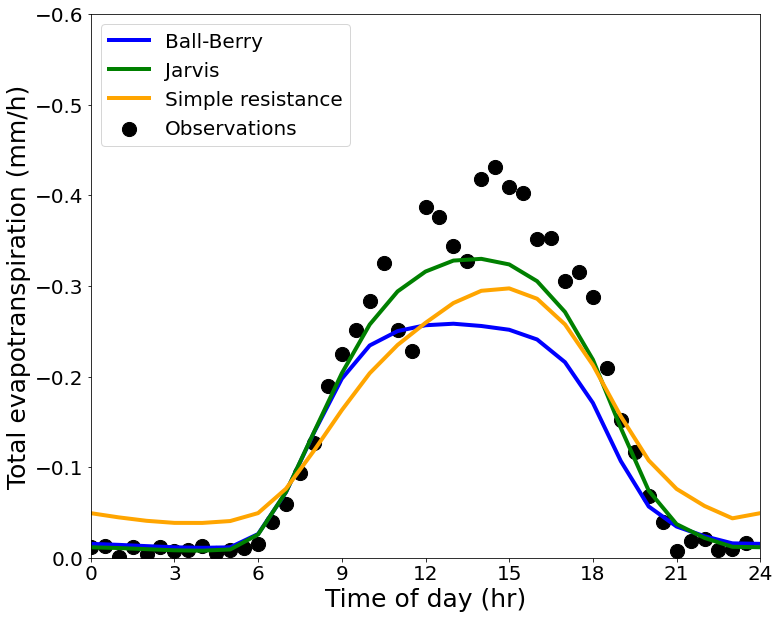

In [39]:
# create plot with three different stomatal resistance parameterizations
ET_Combine_Graph = ET_Combine.plot(color=['blue', 'green', 'orange'],linewidth=4.0,figsize=(12,10))
# invert y axis
ET_Combine_Graph.invert_yaxis()
# plot scatter with x='xvals', y='Observation (aspen)'
ET_Combine_Graph.scatter(xvals, df_gp_hr['Observations'], color='black', s=200, label="Observations")
# add x, y label
plt.xlabel('Time of day (hr)', fontsize=25)
plt.ylabel('Total evapotranspiration (mm/h)', fontsize=25)
# show up the legend
ET_Combine_Graph.legend(fontsize=20, loc=2)
plt.xlim(0,24)
plt.ylim(0,-0.6)
x = [0,3,6,9,12,15,18,21,24]
plt.xticks(x, x, fontsize=20)
plt.yticks(fontsize=20)

## 5. Discussion

As stated in Clark et al., 2015, the following insights can be gained from this analysis:
* The simulations in Figure 7 illustrate substantial differences in the estimates of the diurnal cycle of transpiration depending on the choice of stomatal resistance parameterization. 
* The simple soil resistance parameterization [Liang et al., 1994], when combined with the two-source model of within-canopy and below-canopy turbulence [Choudhury and Monteith, 1988; Clark et al., 2015a], results in a substantial amount of transpiration at night when there is no light available for photosynthesis. 
* The physiological representations of transpiration – using the Jarvis and Ball-Berry parameterizations, as defined in Clark et al. [2015a] – have an explicit dependence on photosynthetically active radiation and show the expected result of zero transpiration during nighttime hours. This results in a poor match with observations (Figure 7).
* A striking result from Figure 7 is that the Ball-Berry parameterization underestimates evapotranspiration when applied using the default model parameters for stomatal resistance in combination with the particular choice of process parameterizations and parameters for soil hydrology.

## 6. Post a new Model Instance, SUMMA output, and notebook back to Hydroshare

In [40]:
from pysumma.hydroshare import hydroshare
hs = hydroshare.hydroshare()

Successfully established a connection with HydroShare


In [41]:
# zip a new SUMMA Model Instance to upload on HydroShare
import shutil, os
archive_name = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance +'_new'))
root_dir = os.path.expanduser(os.path.join('~', os.getcwd() +'/' + instance))
shutil.make_archive(archive_name, 'zip', root_dir)
Model_instance = os.getcwd() +'/' + instance +'_new.zip'

In [48]:
# set meta data such as abstract, title, keywords, rtype to create a new SUMMA Model Instance
title = 'Sensitivity to Stomatal Resistance Parameterization of SUMMA Model in Aspen stand at Reynolds Mountain East_new1'
abstract = 'Sensitivity to Stomatal Resistance Parameterization of SUMMA Model in Aspen stand at Reynolds Mountain East(new)'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'stomatal resistance parameterization', 'Evapotranspiration')
rtype = 'ModelInstanceResource'
fpath = Model_instance,
metadata = '[{"creator":{"name":"Jeffrey Sadler"}}, {"creator":{"name":"Youngdon Choi"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [49]:
# create a new SUMMA Model Instance on HydroShare
resource_id1 = hs.createHydroShareResource(title=title, content_files=fpath, keywords=keywords, abstract=abstract, resource_type='modelinstanceresource', public=False)

Resource Created Successfully                           


In [44]:
# set meta data such as abstract, title, keywords, rtype to create a SUMMA Composite Resource that contains SUMMA Model instance, output, and notebook.
title = 'Sensitivity to Stomatal Resistance Parameterization of SUMMA Model in Aspen stand at Reynolds Mountain East_new'
abstract = 'Sensitivity to Stomatal Resistance Parameterization of SUMMA Model in Aspen stand at Reynolds Mountain East'
keywords = ('SUMMA', 'Hydrologic Model', 'Reynolds Mountain East', 'stomatal resistance parameterization', 'Evapotranspiration')
#rtype = 'GenericResource'
rtype = 'CompositeResource'
files = out_file1, out_file2, out_file3
metadata = '[{"creator":{"name":"Youngdon Choi"}}, {"creator":{"name":"Jeffrey Sadler"}}]'
extra_metadata = '{"key-1": "value-1", "key-2": "value-2"}'

In [45]:
# create a new SUMMA Composite Resource on HydroShare
resource_id2 = hs.createHydroShareResource(title=title, content_files=files, keywords=keywords, abstract=abstract, resource_type='compositeresource', public=False)

Resource Created Successfully                           
Successfully Added Content Files                      


In [46]:
# add a new SUMMA Model Instance to a new SUMMA Composite Resource.
hs.addContentToExistingResource(resource_id2, [Model_instance])

Successfully Added Content Files                      


#### Save this notebook file and add the notebook to the resource

In [47]:
# add a new notebook to a new SUMMA Composite Resource.
npath = os.getcwd() +'/SummaModel_ReynoldsAspennStand_StomatalResistance_Figure7.ipynb'
# check the resource id on HS that created.
hs.addContentToExistingResource(resource_id2, [npath])

Successfully Added Content Files                      
